# Recognition of Online Handwritten Mathematical Expressions

## References:
https://www.isical.ac.in/~crohme/

https://www.cs.rit.edu/~crohme2019/

http://cs231n.stanford.edu/reports/2015/pdfs/mohan_lu_cs231n-project-final.pdf
https://pdfs.semanticscholar.org/b024/eaab5a88a1a0019ad81a1507787f65cbd131.pdf
https://github.com/jungomi/math-formula-recognition
https://programtalk.com/vs2/?source=python/8033/hwrt/
http://saskatoon.cs.rit.edu/inkml_viewer/
https://github.com/anujshah1003/own_data_cnn_implementation_keras

# Character level classification

 ## Generation of Symbols and Labels

In [375]:
 #Import libraries
import os,cv2
import shutil
import matplotlib.pyplot as plt
import numpy as np

import xml.etree.ElementTree 

from keras.layers import Conv2D 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D


In [376]:
#Get the current directory
ospath=os.getcwd()
ospath 

'C:\\Users\\mrudh\\Desktop\\Python\\InkmlProject'

In [377]:
#Create a Chrome Symbols destination folder for the unique symbols from the inkml equation file
symbolPath=ospath + '\\CROHMESymbols\\'
if os.path.exists(symbolPath):
        shutil.rmtree(symbolPath)
os.mkdir(symbolPath)

In [378]:
#Function to convert the equation from inkml files to symbol inkml files

def generateSymbolInkml(path):
    dataset={}
    img_data_list=[]
    labels_list = []
    fileid=0; 
    for files in os.listdir(path):    
        filepath=path+files
        print(filepath)
        root = xml.etree.ElementTree.parse(filepath).getroot()
        strokes = sorted(root.findall('{http://www.w3.org/2003/InkML}trace'),key=lambda child: int(child.attrib['id']))
        #print(strokes)
        #i=0
        trace_groups = root.findall('{http://www.w3.org/2003/InkML}traceGroup')
        trace_group = trace_groups[0]
        segmentation=[]
        for tg in trace_group.findall('{http://www.w3.org/2003/InkML}traceGroup'):
            annotations = tg.findall('{http://www.w3.org/2003/InkML}annotation')
            #print(annotations[0].text)
            trace_views = tg.findall('{http://www.w3.org/2003/InkML}traceView')
            symbol = []
            segmentation=[]
            for traceView in trace_views:    
                symbol.append(int(traceView.attrib['traceDataRef']))
                #print(int(traceView.attrib['traceDataRef']))
            segmentation.append(symbol) 
            #print(segmentation)

            for seg in segmentation:
                #print(seg)
                InkmlFileName=str(fileid)+ ".inkml"
                filename=symbolPath + InkmlFileName
                f= open(filename,"w+")
                f.write('<ink xmlns="http://www.w3.org/2003/InkML">\n')
                f.write('<annotation type="UI">2011_IVC_CIEL_F2_E4</annotation>\n')
                f.write('<annotation type="copyright">LUNAM/IRCCyN</annotation>\n')
                strokeid=0
                for segment in seg:
                    stroke = strokes[segment].text
                    f.write('<trace id=' + '"' + str(strokeid) + '"' + '>\n' + str(stroke) +'\n' +'</trace>\n')
                    strokeid=strokeid+1
                    #i=i+1
                f.write('</ink>')
                f.close()
                fileid=fileid+1
            #print(i)
            dataset[filename]=annotations[0].text
            img_data_list.append(InkmlFileName)
            labels_list.append(annotations[0].text)
    return dataset,img_data_list,labels_list
            #print(filename)

In [379]:
# Call function to convert the equation from inkml files to symbol inkml files 

dataset,img_data_list,labels_list=generateSymbolInkml(ospath + "\\CROHMEData\\")

C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\algb06.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\algb09.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\crohme_f004-eq035.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\dif_eqn07.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\dif_eqn11.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\dif_eqn15.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire001-equation000.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire001-equation001.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire001-equation003.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire001-equation010.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire001-equation011.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire001-equation015.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulai

C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire004-equation070.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire004-equation071.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire005-equation001.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire005-equation006.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire005-equation010.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire005-equation016.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire005-equation018.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire005-equation020.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire005-equation021.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire005-equation024.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\formulaire005-equation026.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\

C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME1G3_11_sub_10.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME1G3_11_sub_21.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME1G3_11_sub_22.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME1G3_12_sub_10.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME1G3_12_sub_21.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME1G3_12_sub_22.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME1G3_1_sub_10.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME1G3_1_sub_21.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME1G3_1_sub_22.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME1G3_2_sub_10.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME1G3_2_sub_21.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME1G3_2_sub_22.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME1G3_3_sub_10.inkml
C:\Use

C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_16_sub_96.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_17_sub_22.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_17_sub_26.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_17_sub_28.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_17_sub_30.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_17_sub_35.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_17_sub_38.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_17_sub_65.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_17_sub_74.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_17_sub_81.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_17_sub_95.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_17_sub_96.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_18_sub_22.inkml

C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_28_sub_35.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_28_sub_38.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_28_sub_65.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_28_sub_74.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_28_sub_81.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_28_sub_95.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_28_sub_96.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_29_sub_22.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_29_sub_26.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_29_sub_28.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_29_sub_30.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_29_sub_35.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\KME2G3_29_sub_38.inkml

C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\tig09.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData1_0_sub_1.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData1_0_sub_12.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData1_0_sub_15.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData1_0_sub_19.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData1_0_sub_21.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData1_0_sub_24.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData1_0_sub_28.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData1_0_sub_3.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData1_0_sub_5.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData1_0_sub_7.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData1_0_sub_9.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\Train

C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_0_sub_71.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_0_sub_73.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_0_sub_88.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_0_sub_9.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_0_sub_95.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_0_sub_98.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_10_sub_1.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_10_sub_11.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_10_sub_13.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_10_sub_15.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_10_sub_17.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_10_sub_20.inkml
C:\Users\mrudh\Desktop\Python\InkmlP

C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_14_sub_39.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_14_sub_41.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_14_sub_43.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_14_sub_46.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_14_sub_49.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_14_sub_51.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_14_sub_6.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_14_sub_61.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_14_sub_63.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_14_sub_71.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_14_sub_73.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_14_sub_88.inkml
C:\Users\mrudh\Desktop\Python

C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_19_sub_46.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_19_sub_49.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_19_sub_51.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_19_sub_6.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_19_sub_61.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_19_sub_63.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_19_sub_71.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_19_sub_73.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_19_sub_88.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_19_sub_9.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_19_sub_95.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_19_sub_98.inkml
C:\Users\mrudh\Desktop\Python\

C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_24_sub_1.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_24_sub_11.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_24_sub_13.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_24_sub_15.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_24_sub_17.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_24_sub_20.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_24_sub_29.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_24_sub_33.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_24_sub_39.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_24_sub_41.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_24_sub_43.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_24_sub_46.inkml
C:\Users\mrudh\Desktop\Python

C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_4_sub_88.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_4_sub_9.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_4_sub_95.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_4_sub_98.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_5_sub_1.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_5_sub_11.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_5_sub_13.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_5_sub_15.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_5_sub_17.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_5_sub_20.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_5_sub_29.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject\CROHMEData\TrainData2_5_sub_33.inkml
C:\Users\mrudh\Desktop\Python\InkmlProject

In [380]:
print(dataset)

{'C:\\Users\\mrudh\\Desktop\\Python\\InkmlProject\\CROHMESymbols\\0.inkml': 'z', 'C:\\Users\\mrudh\\Desktop\\Python\\InkmlProject\\CROHMESymbols\\1.inkml': '1', 'C:\\Users\\mrudh\\Desktop\\Python\\InkmlProject\\CROHMESymbols\\2.inkml': '=', 'C:\\Users\\mrudh\\Desktop\\Python\\InkmlProject\\CROHMESymbols\\3.inkml': 'r', 'C:\\Users\\mrudh\\Desktop\\Python\\InkmlProject\\CROHMESymbols\\4.inkml': '1', 'C:\\Users\\mrudh\\Desktop\\Python\\InkmlProject\\CROHMESymbols\\5.inkml': '(', 'C:\\Users\\mrudh\\Desktop\\Python\\InkmlProject\\CROHMESymbols\\6.inkml': '\\cos', 'C:\\Users\\mrudh\\Desktop\\Python\\InkmlProject\\CROHMESymbols\\7.inkml': '\\theta', 'C:\\Users\\mrudh\\Desktop\\Python\\InkmlProject\\CROHMESymbols\\8.inkml': '1', 'C:\\Users\\mrudh\\Desktop\\Python\\InkmlProject\\CROHMESymbols\\9.inkml': '+', 'C:\\Users\\mrudh\\Desktop\\Python\\InkmlProject\\CROHMESymbols\\10.inkml': 'i', 'C:\\Users\\mrudh\\Desktop\\Python\\InkmlProject\\CROHMESymbols\\11.inkml': '\\sin', 'C:\\Users\\mrudh\\Desk

In [381]:
print(img_data_list)

['0.inkml', '1.inkml', '2.inkml', '3.inkml', '4.inkml', '5.inkml', '6.inkml', '7.inkml', '8.inkml', '9.inkml', '10.inkml', '11.inkml', '12.inkml', '13.inkml', '14.inkml', '15.inkml', '16.inkml', '17.inkml', '18.inkml', '19.inkml', '20.inkml', '21.inkml', '22.inkml', '23.inkml', '24.inkml', '25.inkml', '26.inkml', '27.inkml', '28.inkml', '29.inkml', '30.inkml', '31.inkml', '32.inkml', '33.inkml', '34.inkml', '35.inkml', '36.inkml', '37.inkml', '38.inkml', '39.inkml', '40.inkml', '41.inkml', '42.inkml', '43.inkml', '44.inkml', '45.inkml', '46.inkml', '47.inkml', '48.inkml', '49.inkml', '50.inkml', '51.inkml', '52.inkml', '53.inkml', '54.inkml', '55.inkml', '56.inkml', '57.inkml', '58.inkml', '59.inkml', '60.inkml', '61.inkml', '62.inkml', '63.inkml', '64.inkml', '65.inkml', '66.inkml', '67.inkml', '68.inkml', '69.inkml', '70.inkml', '71.inkml', '72.inkml', '73.inkml', '74.inkml', '75.inkml', '76.inkml', '77.inkml', '78.inkml', '79.inkml', '80.inkml', '81.inkml', '82.inkml', '83.inkml', '

In [382]:
print(labels_list)

['z', '1', '=', 'r', '1', '(', '\\cos', '\\theta', '1', '+', 'i', '\\sin', '\\theta', '1', ')', 'z', '=', '\\log', 'r', '+', 'i', '(', '\\theta', '+', '2', 'n', '\\pi', ')', '\\log', '(', '(', '6', '9', '+', '1', '7', '7', '\\times', '1', '3', '6', ')', '+', '(', '1', '7', '1', '4', '0', ')', '\\gt', '6', '1', '2', '\\div', '5', '1', 'x', '2', 'd', '2', 'y', 'd', 'x', '2', '-', '3', 'x', '+', 'y', '=', '\\log', 'x', '.', '\\sin', '\\log', 'x', '+', '1', 'x', 'd', 'd', 'y', 'x', '(', ')', '-', '-', '-', 'p', '3', '-', '(', 'x', '2', '+', 'x', 'y', '+', 'y', '2', ')', 'p', '2', '+', '(', 'x', '3', 'y', '+', 'x', '2', 'y', '2', '+', 'x', 'y', '3', ')', 'p', '-', 'x', '3', 'y', '3', '=', '0', 'y', '=', 'x', 'p', '+', '\\sqrt', 'b', '2', '+', 'a', '2', 'p', '2', '(', '(', '2', '4', '-', '4', '4', ')', '\\times', '6', ')', '-', '(', '6', '4', '(', '9', '6', '+', '6', '2', ')', ')', '\\gt', '-', '9', '9', '2', '1', '\\div', '1', '1', '\\phi', '(', 'x', ')', 'c', '(', 'a', '-', 'b', ')', 'c', 

# Convert inkml to image file

In [383]:
#Convert the inkml files to png image files

symbolImagePath=ospath + '\\CROHMESymbols'

%run -i inkmltopng.py $symbolImagePath 28 2

CROHMESymbols
Starting inkml to png conversion on 16970 files

file:       9999 |  16970/16970																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																										

# Create label for our Image Files

In [384]:
#Create the image list with the png extension by replacing inkml
img_data_list=np.char.replace(img_data_list,'inkml','png')

In [385]:
img_data_list

array(['0.png', '1.png', '2.png', ..., '16967.png', '16968.png',
       '16969.png'], dtype='<U9')

In [386]:
type(img_data_list)

numpy.ndarray

In [387]:
labels_list

['z',
 '1',
 '=',
 'r',
 '1',
 '(',
 '\\cos',
 '\\theta',
 '1',
 '+',
 'i',
 '\\sin',
 '\\theta',
 '1',
 ')',
 'z',
 '=',
 '\\log',
 'r',
 '+',
 'i',
 '(',
 '\\theta',
 '+',
 '2',
 'n',
 '\\pi',
 ')',
 '\\log',
 '(',
 '(',
 '6',
 '9',
 '+',
 '1',
 '7',
 '7',
 '\\times',
 '1',
 '3',
 '6',
 ')',
 '+',
 '(',
 '1',
 '7',
 '1',
 '4',
 '0',
 ')',
 '\\gt',
 '6',
 '1',
 '2',
 '\\div',
 '5',
 '1',
 'x',
 '2',
 'd',
 '2',
 'y',
 'd',
 'x',
 '2',
 '-',
 '3',
 'x',
 '+',
 'y',
 '=',
 '\\log',
 'x',
 '.',
 '\\sin',
 '\\log',
 'x',
 '+',
 '1',
 'x',
 'd',
 'd',
 'y',
 'x',
 '(',
 ')',
 '-',
 '-',
 '-',
 'p',
 '3',
 '-',
 '(',
 'x',
 '2',
 '+',
 'x',
 'y',
 '+',
 'y',
 '2',
 ')',
 'p',
 '2',
 '+',
 '(',
 'x',
 '3',
 'y',
 '+',
 'x',
 '2',
 'y',
 '2',
 '+',
 'x',
 'y',
 '3',
 ')',
 'p',
 '-',
 'x',
 '3',
 'y',
 '3',
 '=',
 '0',
 'y',
 '=',
 'x',
 'p',
 '+',
 '\\sqrt',
 'b',
 '2',
 '+',
 'a',
 '2',
 'p',
 '2',
 '(',
 '(',
 '2',
 '4',
 '-',
 '4',
 '4',
 ')',
 '\\times',
 '6',
 ')',
 '-',
 '(',
 '6',
 '4

In [388]:
type(labels_list)

list

# Image Preprocessing

In [389]:
#check the shape image from imagelist
img_data = np.array(img_data_list)
print (img_data.shape)

(16970,)


In [390]:
#Create the image list
img_symbol_list=[]

for dataset in img_data_list:
    img=ospath +'\\data_png_CROHMESymbols\\'+ dataset
    input_img=cv2.imread(img )
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    img_symbol_list.append(input_img)

In [391]:
#check the size of the label list
len(labels_list)

16970

In [392]:
#check the shape image from imagelist
img_data = np.array(img_symbol_list)
print (img_data.shape)

(16970, 32, 32)


(-0.5, 31.5, 31.5, -0.5)

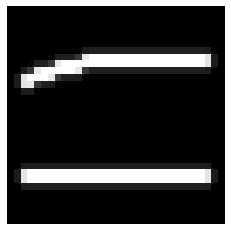

In [393]:
#plot a image from image list
some_math=img_symbol_list[16]
plt.imshow(some_math,cmap="binary")
plt.axis('off')

In [394]:
print(labels_list[16])

=


In [395]:
#Convert the image to array
img_symbol = np.array(img_symbol_list)
#Convert the image to float
img_symbol = img_symbol.astype('float32')
#normalize the image
img_symbol /= 255
print (img_symbol.shape)

(16970, 32, 32)


In [396]:
#check the first image
img_symbol[0][0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

# Preprocessing output labels

In [397]:
#convert the label list to array
labels = np.array(labels_list)
labels

array(['z', '1', '=', ..., '3', 'k', ')'], dtype='<U11')

In [398]:
#Get the unique number of symbols from the labels list

print(len(np.unique(labels)))

75


In [399]:
# Create the dictionary with the unique labels to map the symbols

labelDict={}
symbolId=0
for symbol in np.unique(labels):
    labelDict[symbol]=symbolId
    symbolId=symbolId+1

In [400]:
# Printing the first five elements of the label dictionary

for labeldict in list(labelDict)[0:5]:
    print (labeldict,":", labelDict[labeldict])

! : 0
( : 1
) : 2
+ : 3
, : 4


In [401]:
# Update our labels with the label id from the dictionary mapping

symbolLabel=np.array([labelDict[symbol] for symbol in labels])
print(labels[0],symbolLabel[0],type(symbolLabel))

z 74 <class 'numpy.ndarray'>


In [402]:
# Convert the symbol Label type to int

symbolLabel=symbolLabel.astype(np.uint8)
symbolLabel

array([74,  9, 18, ..., 11, 66,  2], dtype=uint8)

In [403]:
#

img_symbol= np.expand_dims(img_symbol, axis=3) 
print (img_symbol.shape)

(16970, 32, 32, 1)


In [404]:
#Shuffle the dataset
from sklearn.utils import shuffle
x,y = shuffle(img_symbol,symbolLabel, random_state=2)
print(y[0])

9


In [405]:
#print the shape of x and y 
print(x.shape,y.shape)

(16970, 32, 32, 1) (16970,)


# Split the dataset into train and test

In [406]:
# Split the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [407]:
#check the shape of train and test datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13576, 32, 32, 1) (3394, 32, 32, 1) (13576,) (3394,)


In [408]:
#check the shape of  x train
X_train[0].shape

(32, 32, 1)

# Plot and visualise the image

In [409]:
#plot a random tain image
some_math=X_train[0][0:]
some_math.shape
#plt.imshow(some_math,cmap="binary")

(32, 32, 1)

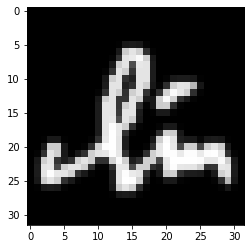

In [410]:
train_data = np.reshape(X_train[0],(32, 32))
train_data.shape
plt.imshow(train_data,cmap="binary")

In [411]:
y_train[0]

40

In [412]:
#labelDict[4]
print(list(labelDict.keys())[list(labelDict.values()).index(4)])

,


In [413]:
input_shape=img_symbol.shape
input_shape

(16970, 32, 32, 1)

# Build the Model

In [414]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',input_shape=[32,32,1], activation ='relu'))
model.add(Conv2D(filters=32, kernel_size=3,activation ='relu'))

model.add(MaxPooling2D(pool_size=2,strides= 2,padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=3, activation ='relu'))

model.add(MaxPooling2D(pool_size=2,strides= 2,padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=64,activation ='relu'))

model.add(Dropout(0.5))
model.add(Dense(units=75,activation ='softmax'))

In [415]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=["accuracy"])

In [416]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 6, 6, 64)         

True

In [417]:
hist = model.fit(X_train, y_train, batch_size=16, epochs=30, verbose=1, validation_data=(X_test, y_test))

Train on 13576 samples, validate on 3394 samples
Epoch 1/30
13576/13576 [==============================] - 25s 2ms/step - loss: 3.7007 - accuracy: 0.1138 - val_loss: 3.3976 - val_accuracy: 0.1202
Epoch 2/30
13576/13576 [==============================] - 22s 2ms/step - loss: 3.0458 - accuracy: 0.2806 - val_loss: 2.3537 - val_accuracy: 0.5174
Epoch 3/30
13576/13576 [==============================] - 22s 2ms/step - loss: 2.2937 - accuracy: 0.4568 - val_loss: 1.6820 - val_accuracy: 0.6408
Epoch 4/30
13576/13576 [==============================] - 22s 2ms/step - loss: 1.8802 - accuracy: 0.5418 - val_loss: 1.2163 - val_accuracy: 0.7263
Epoch 5/30
13576/13576 [==============================] - 22s 2ms/step - loss: 1.6050 - accuracy: 0.5923 - val_loss: 1.1189 - val_accuracy: 0.7684
Epoch 6/30
13576/13576 [==============================] - 22s 2ms/step - loss: 1.4188 - accuracy: 0.6291 - val_loss: 0.8581 - val_accuracy: 0.7926
Epoch 7/30
13576/13576 [==============================] - 22s 2ms/ste

# Evaluating the Model

In [418]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.3079192382072219
Test accuracy: 0.9210371375083923


In [419]:
test_image = X_test[8:9]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))

(1, 32, 32, 1)
[[1.44e-05 3.37e-06 5.47e-07 1.52e-03 1.06e-06 9.95e-01 7.16e-08 6.34e-07
  8.81e-10 1.11e-06 3.92e-07 1.74e-06 6.88e-07 1.29e-06 5.52e-07 2.38e-05
  5.26e-08 1.86e-09 1.38e-05 3.19e-08 3.30e-09 1.73e-07 4.57e-06 2.25e-09
  1.06e-07 2.81e-07 1.33e-08 4.24e-07 5.98e-08 3.23e-03 2.07e-07 2.57e-08
  2.55e-08 7.37e-08 5.33e-08 7.30e-08 5.44e-08 1.43e-08 5.50e-05 9.29e-07
  2.08e-08 3.36e-09 3.17e-07 2.18e-07 1.81e-09 2.64e-08 4.24e-06 5.32e-04
  3.81e-08 4.28e-06 3.25e-08 3.00e-08 6.56e-09 1.92e-08 3.28e-07 9.89e-08
  1.62e-08 3.80e-09 1.55e-07 1.27e-07 4.22e-08 5.55e-08 7.00e-08 7.69e-09
  1.65e-05 3.41e-07 1.82e-07 8.60e-09 8.23e-10 3.75e-08 4.52e-09 1.43e-05
  3.35e-09 7.75e-09 2.62e-07]]
[5]


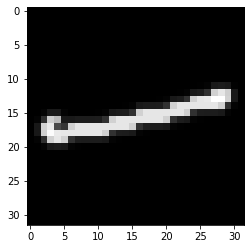

In [420]:
train_data = np.reshape(X_test[8],(32, 32))
train_data.shape
plt.imshow(train_data,cmap="binary")

In [421]:
index=y_test[8]
print(index)

5


In [422]:
print(list(labelDict.keys())[list(labelDict.values()).index(index)])

-


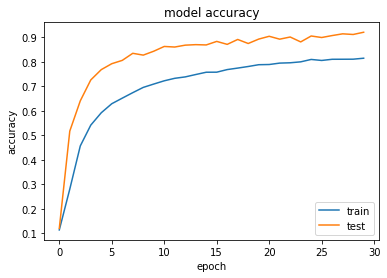

In [423]:
# Plot the model accuracy curve with respect to epochs

plt.clf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

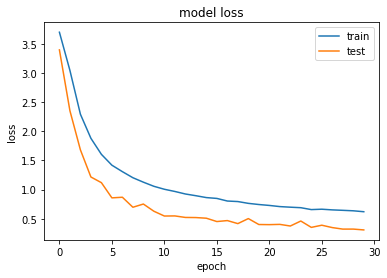

In [424]:
# Plot the model loss curve with respect to epochs

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Testing the model with a new image

In [425]:
#Create a Chrome Symbols destination folder for the unique symbols from the inkml equation file
symbolPath=ospath + '\\TestData\\CROHMESymbolsTest\\'
if os.path.exists(symbolPath):
        shutil.rmtree(symbolPath)
os.mkdir(symbolPath)

In [426]:
# Generate the individual symbol inkml test files from the equation inkml file in the test folder

dataset_test,img_data_list_test,labels_list_test=generateSymbolInkml(ospath + "\\TestData\\CROHMEData\\")

C:\Users\mrudh\Desktop\Python\InkmlProject\TestData\CROHMEData\formulaire050-equation040.inkml


### Convert inkml to image file

In [427]:
#Convert the symbol inkml files to png image files

Testpath=ospath + "\\TestData\\CROHMESymbolsTest"

%run -i inkmltopng.py $Testpath 28 2

CROHMESymbolsTest
Starting inkml to png conversion on 22 files

file:          9 |     22/22

Finished


### Image Preprocessing

In [428]:
# Preprocess the symbol image as input to the CNN model

img=ospath +'\\data_png_CROHMESymbolsTest\\'+ '0.png'
test_image=cv2.imread(img )
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

(32, 32)


In [429]:
# Reshape the dimensions of the image

img_data= np.expand_dims(test_image, axis=2) 
print (img_data.shape)

(32, 32, 1)


In [430]:
img_data= np.expand_dims(img_data, axis=0)
print (img_data.shape)

(1, 32, 32, 1)


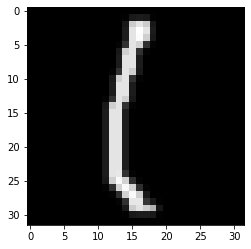

In [431]:
# Let's plot our test image

img_data_plot = np.reshape(img_data,(32, 32))
#train_data.shape
plt.imshow(img_data_plot,cmap="binary")

In [432]:
# Let's predict the test image with our CNN model

predict=model.predict_classes(img_data)
print(predict)

[1]


In [433]:
#Let's check the model prediction with our label dictionary

print(list(labelDict.keys())[list(labelDict.values()).index(predict)])

(


## Confusion Matrix

In [434]:
# Printing the confusion matrix

from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

target_names = labelDict.keys() 

print(classification_report(y_test, y_pred,target_names=target_names,labels=labels))


              precision    recall  f1-score   support

           !       0.00      0.00      0.00         0
           (       0.84      0.85      0.85        87
           )       0.00      0.00      0.00         0
           +       0.00      0.00      0.00         0
           ,       0.84      0.85      0.85        87
           -       0.00      0.00      0.00         0
           .       0.00      0.00      0.00         0
           /       0.00      0.00      0.00         0
           0       0.84      0.85      0.85        87
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.84      0.85      0.85        87
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00    

In [435]:
# Let's print the confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 22   1   0 ...   0   0   0]
 [  0  74   0 ...   0   0   0]
 [  0   0  78 ...   0   0   0]
 ...
 [  0   0   0 ... 269   0   0]
 [  0   0   0 ...   1  86   0]
 [  0   0   0 ...   1   0  76]]


In [436]:
#Let's see some of the predictions

print(y_test[6:10])
print(y_pred[6:10])
print(y_test!=y_pred)

[66 74  5 49]
[66 74  5 49]
[False False False ... False False False]
